<a href="https://colab.research.google.com/github/RaffaeleBini/Project_01/blob/main/RaffaeleBiniMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto di Machine Learning - Food


Addestramento di un Modello di Apprendimento con validazione degli Iperparametri e valutazione delle Performance. <br><br>
Il Modello è applicato ad un Dataset che contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani.

Lo **scopo del Progetto** è quello di addestrare, selezionare e valutare un Modello di Classificazione che consenta di classificare un vino in una delle tre categorie, partendo dai dati sulle relative analisi chimiche.

### Nota Introduttiva
Dopo il primo tentativo di Progetto non superato, ho capito di non essere abbastanza preparato e di avere le idee confuse; pertanto, sono ripartito da zero iniziando con la teoria (libri di machine learning) e poi riprendendo la pratica (tutorial e mini progetti) ma seguendo un filo logico più adatto al mio modo di ragionare e comprendere le cose. Questo secondo Progetto è dunque totalmente nuovo: ho fatto tabula rasa e ho ricostruito il Progetto da capo. Indipendentemente da quella che sarà la valutazione, questa volta ho svolto il Progetto con piena consapevolezza di ogni passaggio e di quello che stavo facendo, sviluppandolo con la mia testa e non andando a cercare, estrarre e copiare pezzi da risorse in rete senza magari capire pienamente cosa stavo facendo. ciò, per me, è già un grande successo, senza contare che con questo nuovo approccio, ho iniziato ad appassionarmi davvero alla materia. Infine, grazie ancora per i feedback al primo Progetto, che mi hanno aperto gli occhi e dato lo stimolo per riprendere il cammino con un diverso approccio mentale.

## Indice degli argomenti:

- [1. Caricamento e lettura del Data Set](#1)
- [2. Check preliminare dei Dati](#2)
- [3. Exploratory Data Analysis](#3)
- [4. Preparazione dei Dati per la modellazione](#4)
- [5. Sviluppo e Valutazione dei Modelli](#5)
- [6. Conclusioni](#6)


<a id="1"> </a>

## 1. Caricamento e lettura del Data Set



In [ ]:
# importo le librerie necessarie per lo svolgimento del progetto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importo il DataSet da sklearn
from sklearn import datasets

wine = datasets.load_wine()

In [ ]:
# Utilizzo il DataSet per creare un Dataframe con Pandas
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# Creo una colonna 'label' relativa all'informazione sulla Classe
df["label"] = wine.target

In [ ]:
# Visualizzo come è fatto il DataFrame
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

<a id="2"> </a>

## 2. Check preliminare dei dati

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

Il DataFrame contiene **178 istanze** caratterizzate da **13 Features** relative a **3 Classi** di Vini.

Le Feature sono tutte **numeriche**.

Inoltre, nel DataFrame **non ci sono elementi nulli o mancanti**.

In [ ]:
df.describe().transpose()

count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
proline                       178.0  746.893258  314.907474  278.00  500.5000   
label                         178.0    0.938202    0.775035    0.00    0.0000   

                                  50%       75%      max  
alcohol                        13.050   13.6775    14.83  
malic_acid                      1.865    3.0825     5.80  
ash                             2.360    2.5575     3.23  
alcalinity_of_ash              19.500   21.5000    30.00  
magnesium                      98.000  107.0000   162.00  
total_phenols                   2.355    2.8000     3.88  
flavanoids                      2.135    2.8750     5.08  
nonflavanoid_phenols            0.340    0.4375     0.66  
proanthocyanins                 1.555    1.9500     3.58  
color_intensity                 4.690    6.2000    13.00  
hue                             0.965    1.1200     1.71  
od280/od315_of_diluted_wines    2.780    3.1700     4.00  
proline                       673.500  985.0000  1680.00  
label                           1.000    2.0000     2.00

Vedo che ci sono un paio di Features (magnesium, proline) che hanno valori di **ordini di grandezza diversi** dalle altre Feature: dovrò valutare questo aspetto in fase di costruzione del modello (ad esempio, andando a scegliere algoritmi di classificazione non sensibili alla scala, come il Random Forest).  

<a id="3"> </a>

## 3. Exploratory Data Analysis

### Distribuzione delle Classi

In [ ]:
# Vado a verificare la distribuzione delle classi
df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

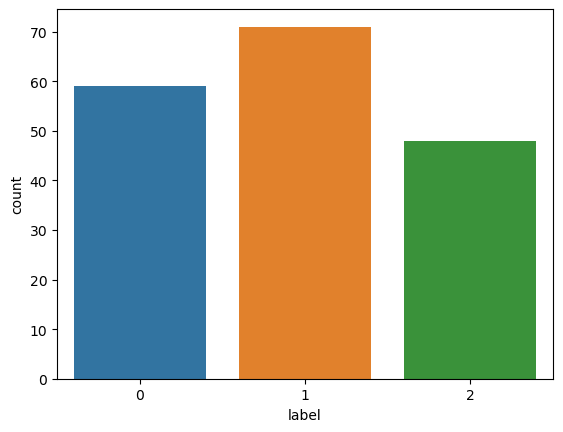

In [ ]:
sns.countplot(data=df, x=df['label'])
plt.show()

In [ ]:
# calcolo la percentuale di ciascuna classe rispetto al totale
class_perc = 100 * (df['label'].value_counts())/len(df)
class_perc

1    39.887640
0    33.146067
2    26.966292
Name: label, dtype: float64

Le tre classi non sono perfettamente bilanciate, c'è un leggero sbilanciamento, in quanto i valori delle classi 0 ed 1 hanno una presenza leggermente superiore a quelli della classe 2. Tuttavia, essendo il data set relativamente piccolo, preferisco non effettuare resampling, ma considerare di:
- utilizzare algoritmi di classificazione robusti allo sbilanciamento delle classi, come Support Vector Machine e Random Forest;
- utilizzare metriche di valutazione che tengano conto dello sbilanciamento, come F1-Score o la curva ROC


### Analisi delle Correlazioni

In [ ]:
# Esamino le correlazioni tra le Features e la Label
df.corr()['label'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
label                           1.000000
Name: label, dtype: float64

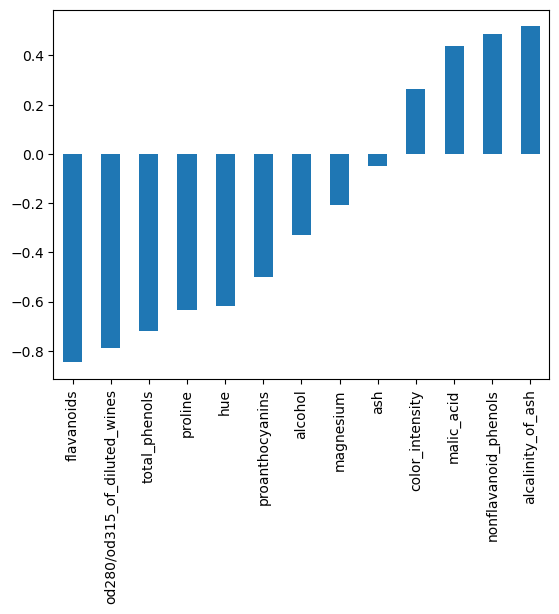

In [ ]:
# per facilitare la lettura, visualizzo i valori di correlazione in un grafico a barre
df.corr()['label'][:-1].sort_values().plot(kind='bar')
plt.show()

In generale, non tutte le Feature hanno la stessa importanza sulla determinazione della Classe: si nota che alcune Features hanno un indice di correlazione in valore assoluto basso. Tuttavia, visto che il numero delle Features non è elevato, preferisco tenerle tutte nella costruzione del modello.

<Figure size 1600x1600 with 0 Axes>

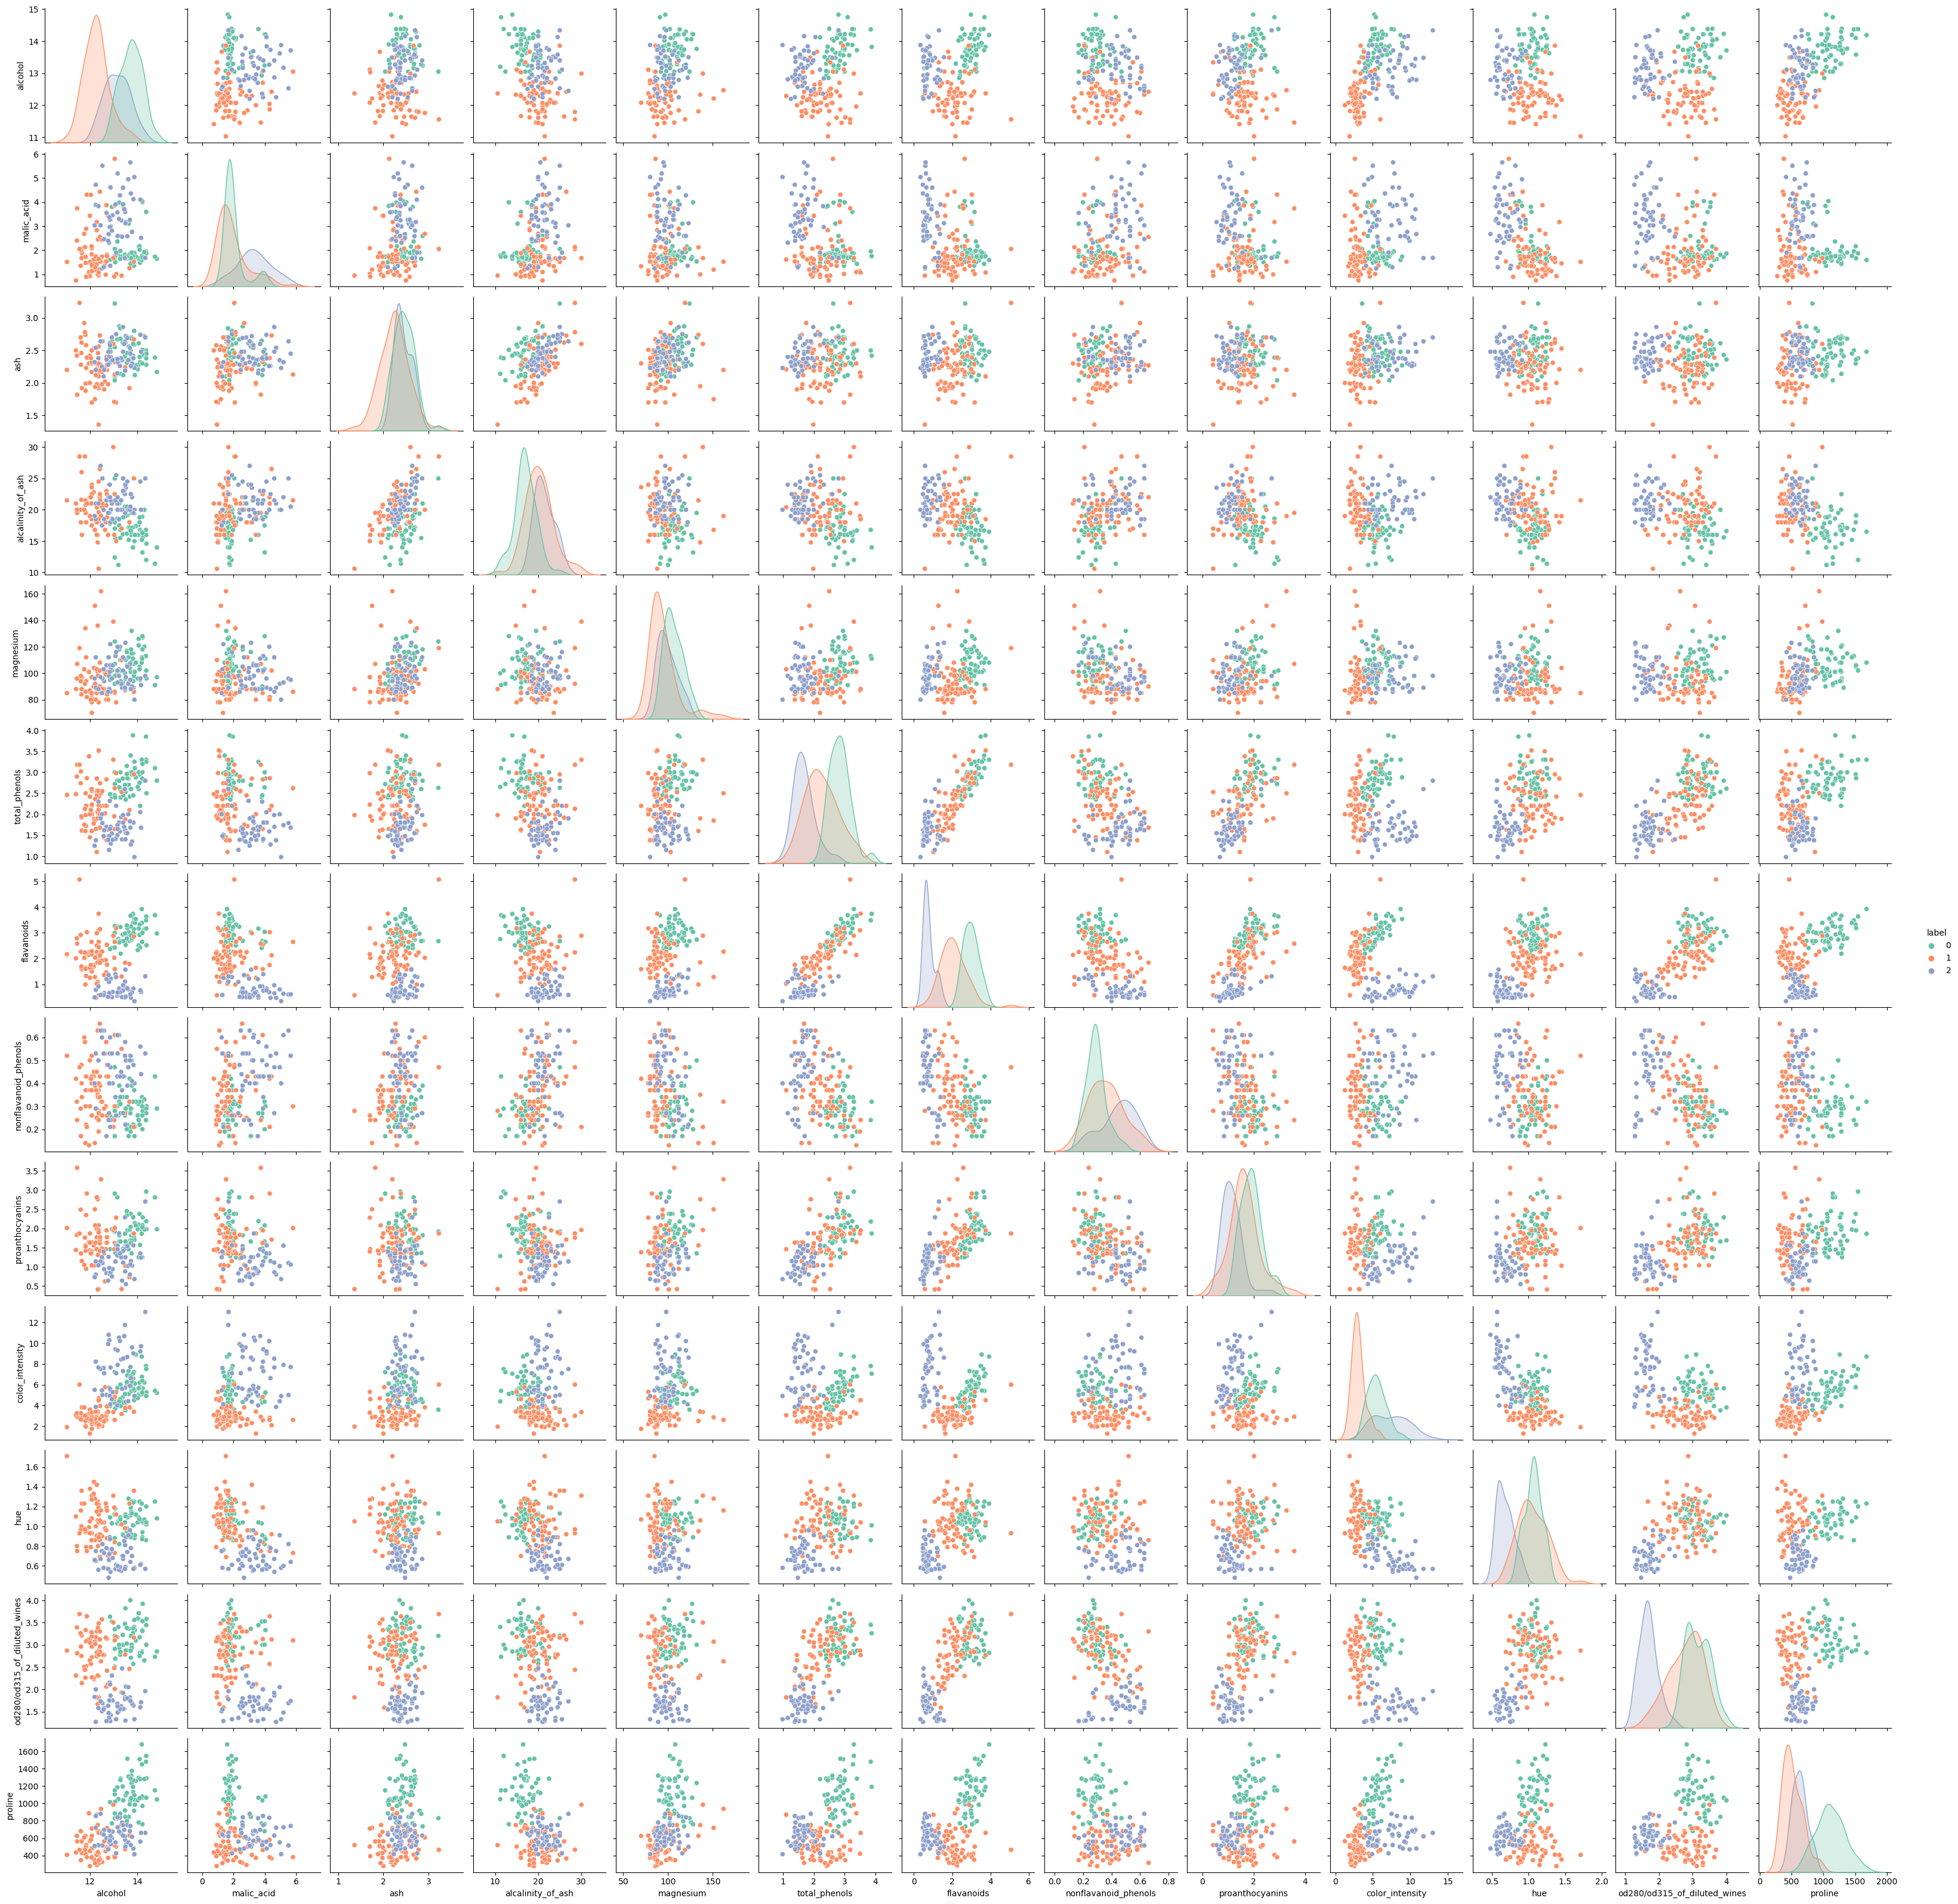

In [ ]:
# visualizzo graficamente le correlazioni
plt.figure(figsize=(8,8),dpi=200)
sns.pairplot(data=df, hue='label', palette='Set2')
plt.show()

Dal grafico **Pairplot** con colorazione diversa per ciascuna classe, vedo che molte delle correlazioni tra le Feature mostrano una suddivisione tra le classi abbastanza netta, senza grandi sovrapposizioni. In fase di costruzione e verifica del modello, questa informazione potrebbe essermi utile per fare delle scelte di ottimizzazione.

In questa ottica, vado a vedere anche la **clustermap** per evidenziare le eventuali Features che condividono caratteristiche simili.

<Figure size 1600x1600 with 0 Axes>

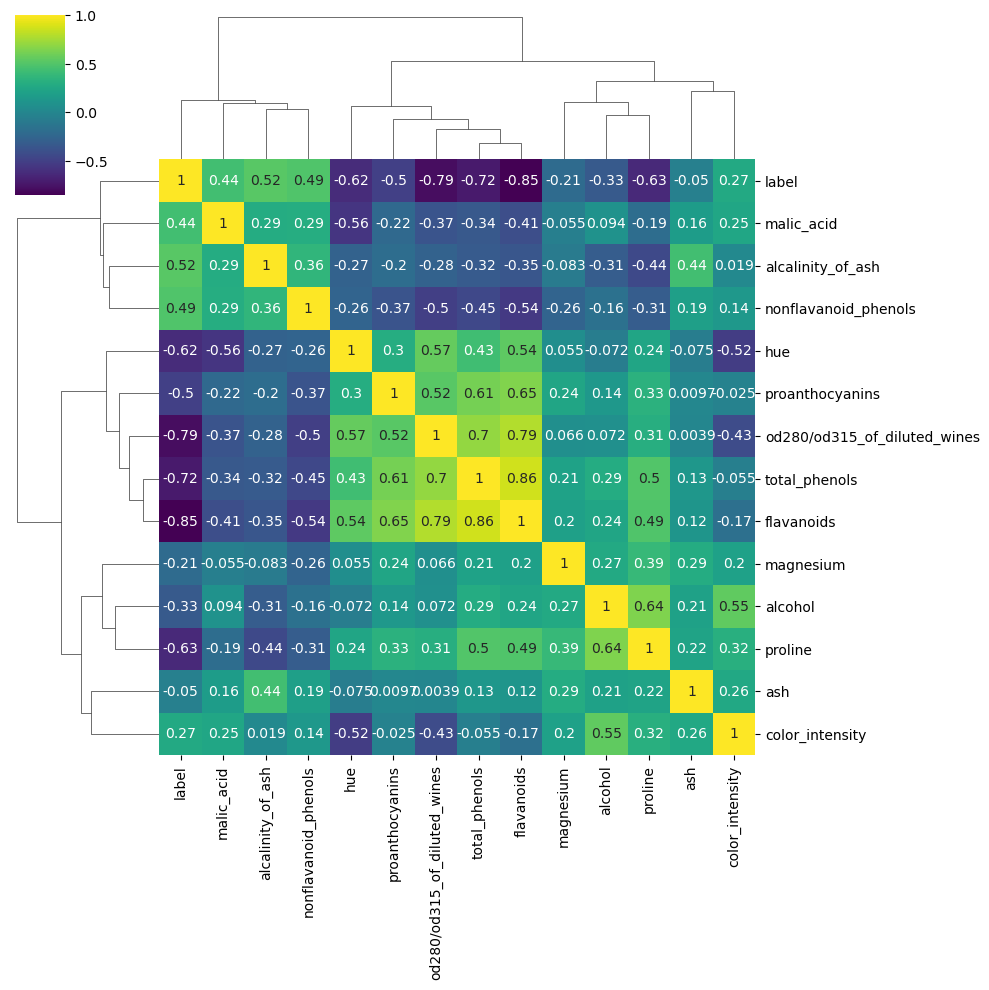

In [ ]:
plt.figure(figsize=(8,8), dpi=200)
sns.clustermap(df.corr(),cmap='viridis', annot=True)
plt.show()

<a id="4"> </a>

## 4. Preparazione dei Dati per la modellazione

Preparo i Dati per la costruzione dei modelli e vado a suddividerli in un Set di Training ed uno di Test.

I campioni a disposizione non sono tantissimi, per cui terrò un 30% dei dati per il Test, in modo da riuscire a testare il modello su un campione significativo.

In [ ]:
# separo le variabili
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# effettuo il train/test split
# scelgo random_state=78 perchè è il mio anno di nascita :-)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

<a id="5"> </a>

## 5. Sviluppo e Valutazione dei Modelli


### Per affrontare questo problema di **Classificazione**, ritengo utile sviluppare **tre tipi di modello**, che poi andrò a valutare e confrontare per definire il più adatto:

- **Support Vector Machine**: costruirò un modello SupportVectorClassifier, che per le sue caratteristiche è efficiente in spazi con molte dimensioni, è in grado di gestire lo sbilanciamento ed integra la regolarizzazione, prevenendo l'overfitting. Per questo Modello, andrò ad ottimizzare **3 Iperparametri**: il Parametro di Regolarizzazione, il kernel ed il Gamma;
- **Random Forest**: svilupperò un modello Random Forest che, in generale, ha il vantaggio di elevata efficienza, non necessita di pre-processare i dati, non risente di sbilanciamento e consente di stimare l'importanza delle feature (utile, ad esempio, per creare una 'linea guida' sulla classificazione). Per questo modello, andrò a ricercare la combinazione migliore tra **4 iperparametri**: n_estimators, max_features, bootstrao ed oob_score;
- **Gradient Boosting**: infine, creerò anche un modello GradientBoostingClassifier, che presenta elevata precisione, bassa sensibilità all'Overfitting, non necessita di preprocessare i dati e permette di stimare l'importanza delle Features. Per questo modello, lavorerò su **3 Iperparametri**: n_estimators, learning_rate e max_depth.

**Nota generale**: per molti Iperparametri ho selezionato dei valori che ho trovato spesso nei manuali o nei tutorial, non avendo ancora una mia esperienza tale da suggerirmi valori più adatti per determinati scopi. Ho cercato di sopperire alla mancanza di esperienza testando sempre almeno un paio di valori e confrontando i risultati in termini di performance del modello.

### Support Vector Machine

#### Preprocessing

In [ ]:
# E' necessario scalare le Feature, perchè alcune hanno ordine di grandezza diverso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling

In [ ]:
from sklearn.svm import SVC

Creo un'istanza del modello, invocando il parametro 'class_weight' per gestire il leggero **sbilanciamento** tra le classi: questo parametro, infatti, regola automaticamente il bilanciamento tramite dei pesi inversamente proporzionali alle frequenze con cui le classi compaiono nei dati di input.

In [ ]:
svc = SVC(class_weight='balanced')

Per la definizione del modello ottimale, utilizzo l'algoritmo di **Grid Search** con **Cross-Validazione**, andando a definire una griglia di valori da utilizzare in tutte le possibili combinazioni come Iperparametri per il modello, in modo da scegliere quelli che performano meglio.

In [ ]:
from sklearn.model_selection import GridSearchCV

# creo la griglia dei parametri
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['rbf','poly'],
              'degree':[2,3,4],
              'gamma':['scale','auto']}

# applico un'istanza del modello al SVC precedentemente creato
grid = GridSearchCV(svc,param_grid)

**Sulla scelta degli Iperparametri**

Il **Parametro di Regolarizzazione C** è inversamente proporzionale alla 'forza' della regolarizzazione e rappresenta il compromesso tra gli errori di classificazione sui dati di training e la semplicità della superficie di decisione. Non è facile trovare il miglior compromesso, per questo ho scelto un range ampio di valori e procedo alla ricerca del valore ottimale per tentativi, affidandomi al Grid Search.

Per il **Kernel** ho considerato il rbf (che in molte fonti è indicato come il migliore per la classificazione) ed il poly, lasciando fuori il linear ed il sigmoid, che ho ritenuto non adeguati per una classificazione su 3 label. Per il Poly, ho definito anche l'Iperparametro **degree** sperimentando il Grid Search su grado 2, 3 e 4.

Il **Gamma** definisce quanta influenza ha ogni singolo esempio di training; se è troppo grande, genera Overfitting. Per questo ho scelto i valori scale e auto.

In [ ]:
# effettuo il fit del modello
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']})

Come risultato del Grid Search con Cross Validazione, visualizzo i **Parametri Migliori** per questo Modello.

In [ ]:
grid.best_params_

{'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

#### Previsione e Valutazione del Modello
Applico il Modello ai dati di Test per effettuare la previsione e ne valuto la **Performance** attraverso la **Matrice di Confusione** ed il **Classification Report**.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix

In [ ]:
# effettuo la previsione sui dati di Test
grid_pred = grid.predict(scaled_X_test)

/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x1600 with 0 Axes>

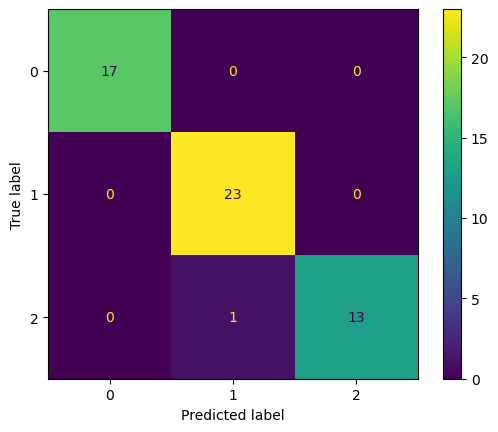

In [ ]:
# visualizzo la Confusion Matrix
plt.figure(figsize=(8,8), dpi=200)
plot_confusion_matrix(grid,scaled_X_test,y_test)
plt.show()

La **Matrice di Confusione** mi dice che ho **un solo caso di errata classificazione**: sembra che il modello performi bene.

In [ ]:
# visualizzo il Classification Report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.96      1.00      0.98        23
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Il **Classification Report** evidenzia una **ottima performance** del modello, con addirittura un 100% di precisione, recall ed F1-score per la classe 0.

### Random Forest
In questo caso, non è necessario effettuare alcun preprocessing dei dati.

#### Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Utilizzo di nuovo il **Grid Search** con **Cross Validazione**, per cui vado a definire la griglia dei Parametri da testare.

In [ ]:
# valori degli Iperparametri da testare
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

**Sulla scelta degli Iperparametri**

**n_estimators**: in genere, i valori suggeriti per il numero di Alberi è di 64 o 128; tuttavia, avendo deciso di affidarmi al Grid Search, ho voluto testare anche un valore intermedio di 100 ed un valore più alto (200) per vedere se la performance del modello ne beneficia. Verificherò l'efficacia andando a valutare l'errore nella previsione.

**max_features**: per modelli di Classificazione, in letteratura è suggerito per il numero massimo di feature un valore attorno alla radice quadrata del numero di features: in questo caso, sarebbe un valore tra 3 e 4. Avendo visto, però, che esiste una clusterizzazione tra le Feature, ho deciso di includere anche il 2.

**bootstrap** e **oob_score**: tengo tutti i valori possibili e lascio fare la scelta al Grid Search.

In [ ]:
# creo la griglia
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

**Nota**: il parametro **oob_score** ha senso solo quando il parametro **bootstrap** è True; pertanto, per le altre combinazioni, già so che il Modello mi restituirà degli warning di errore.

In [ ]:
# creo le istanze del Modello
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
# effettuo il Fit
grid.fit(X_train,y_train)

/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warni

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

Vado a visualizzare la **miglior combinazione di Iperparametri**.

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

#### Previsione e Valutazione del Modello
Anche in questo caso, applico il Modello ai dati di Test per effettuare la previsione e ne valuto la **Performance** attraverso la **Matrice di Confusione** ed il **Classification Report**.

In [ ]:
# effettuo la previsione
predictions = grid.predict(X_test)

/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x1600 with 0 Axes>

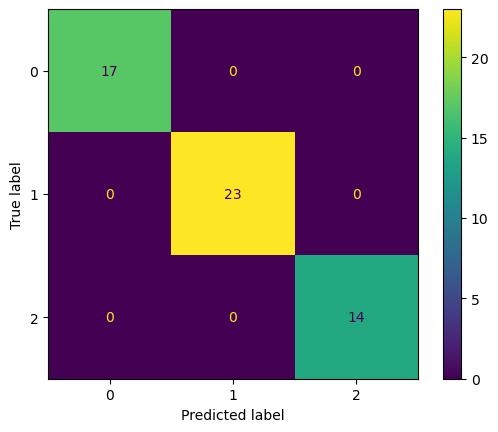

In [ ]:
# Visualizzo graficamente la Matrice di COnfusione
plt.figure(figsize=(8,8), dpi=200)
plot_confusion_matrix(grid,X_test,y_test)
plt.show()

Dalla **Matrice di Confusione** vedo che non ci sono casi di classificazione non corretta.
Vediamo il **Report di Performance** del modello.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Il Report evidenzia che il Modello di Classificazione con **Random Forest** ha una performance **ottima**: tutte le metriche di valutazione hanno il punteggio massimo.

Per comprendere meglio la scelta dell'Iperparametro **n_estimators** posso andare a rappresentare graficamente la relazione tra **errore di classificazione** e **n_estimators** e, parallelamente, la relazione tra **numero di non corrette classificazioni** ed **n_estimators**.

**Nota**: n_estimators rappresenta il numero di Decision Trees utilizzati dal modello.

Parto dai best params individuati, ma vado ad impostare un ciclo sul n_estimators, in modo da vedere come cambiano l'errore di classificazione ed il numero di non corrette classificazioni al variare di questo parametro.

In [ ]:
# creo due liste vuote, una per l'errore ed una per il numero di non corrette classificazioni
# in questo modo potrò vedere graficamente le due correlazioni
from sklearn.metrics import accuracy_score
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

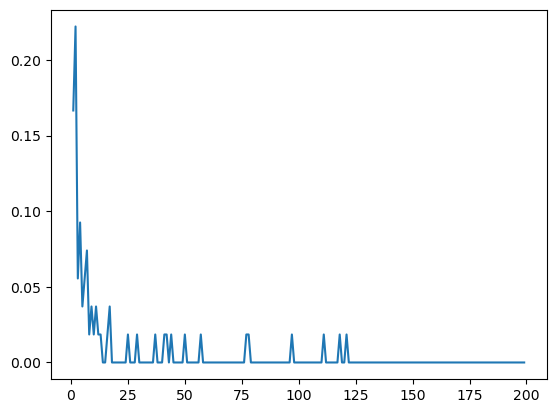

In [ ]:
# grafico errore - n_estimators
plt.plot(range(1,200),errors)

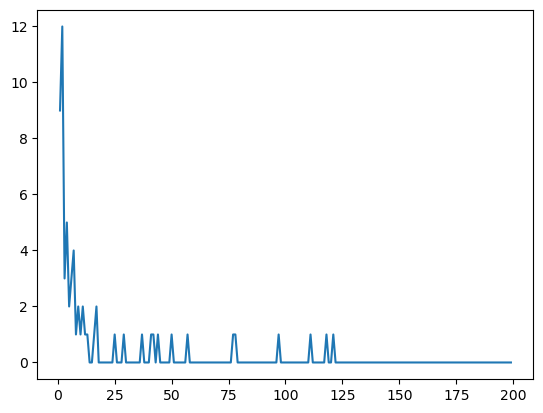

In [ ]:
# grafico gli errori di classificazione rispetto ad n_estimators
plt.plot(range(1,200),misclassifications)

Da questi due grafici vedo che prendendo un n_estimators maggiore di 64, di fatto non ho significativi miglioramenti. Anzi, si potrebbe testare il modello anche con un n_estimators più basso, intorno a 24, ottenendo ugualmente delle ottime performance.

### Gradient Boosting
Anche in questo caso, non occorre alcuna operazione di Preprocessing.

#### Modelling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Procedo nuovamente con il **Grid Search** e la **Cross Validazione**.

In [ ]:
# definisco la griglia degli Iperparametri da testare
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

**Sulla scelta degli Iperparametri**
**n_estimators**: indica il numero di alberi da utilizzare. Ho scelto due valori abbastanza tipici in lettaratura, cercando un buon compromesso tra la complessità del modello ed il tempo di addestramento.
**learning_rate**: anche in questo caso ho scelto tre valori adatti a bilanciare il tempo di addestramento. In generale, più il learning rate è piccolo, maggiore è il tempo di addestramento e la sequenza di alberi da utilizzare.
**max_depth**: ho iniziato con un valore basso, andando poi ad aumentare leggermente, senza esagerare per evitare overfitting.

In [ ]:
# creo l'istanza del modello
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

In [ ]:
# eseguo il fit del modello
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

Vediamo la miglior combinazione dei parametri risultata:

In [ ]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

#### Previsione e Valutazione del Modello
Come per i precedenti modelli, vado ad effettuare la previsione sui dati di test e ne valuto la **Performance** attraverso la **Matrice di Confusione** ed il **Classification Report**.

In [ ]:
predictions = grid.predict(X_test)

/Users/raffaelebini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x1600 with 0 Axes>

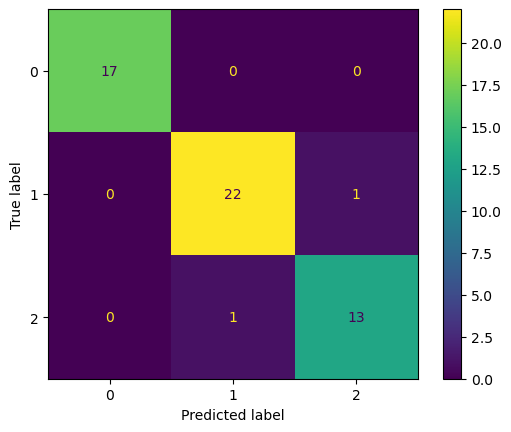

In [ ]:
# Visualizzo graficamente la Matrice di COnfusione
plt.figure(figsize=(8,8), dpi=200)
plot_confusion_matrix(grid,X_test,y_test)
plt.show()

La Matrice mostra che con questo modello si sono riscontrati **2 casi di non corretta classificazione**.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.96      0.96      0.96        23
           2       0.93      0.93      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



Il **Report di Classificazione** evidenzia che la performance per le classi 1 e 2 non è la migliore: i valori di Precision, Recall ed F1-Score, infatti, pur essendo molto buoni. sono inferiori al modello con Random Forest.

E' interessante utilizzare questo modello per andare a valutare l'**Importanza delle Features**.

Usando il metodo feature_importances_ vado a costruire un DataFrame che mi consenta di valutare l'importanza delle Features.

In [ ]:
feat_import = grid.best_estimator_.feature_importances_

In [ ]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                       columns=['Importance'])
imp_feat = imp_feat.sort_values('Importance', ascending=False)
imp_feat

Importance
color_intensity               2.830541e-01
proline                       2.784751e-01
od280/od315_of_diluted_wines  2.282808e-01
flavanoids                    7.999000e-02
magnesium                     7.904479e-02
malic_acid                    3.401831e-02
ash                           5.340894e-03
total_phenols                 4.727708e-03
hue                           3.699061e-03
alcohol                       2.906296e-03
alcalinity_of_ash             3.854304e-04
proanthocyanins               7.749709e-05
nonflavanoid_phenols          6.841953e-08

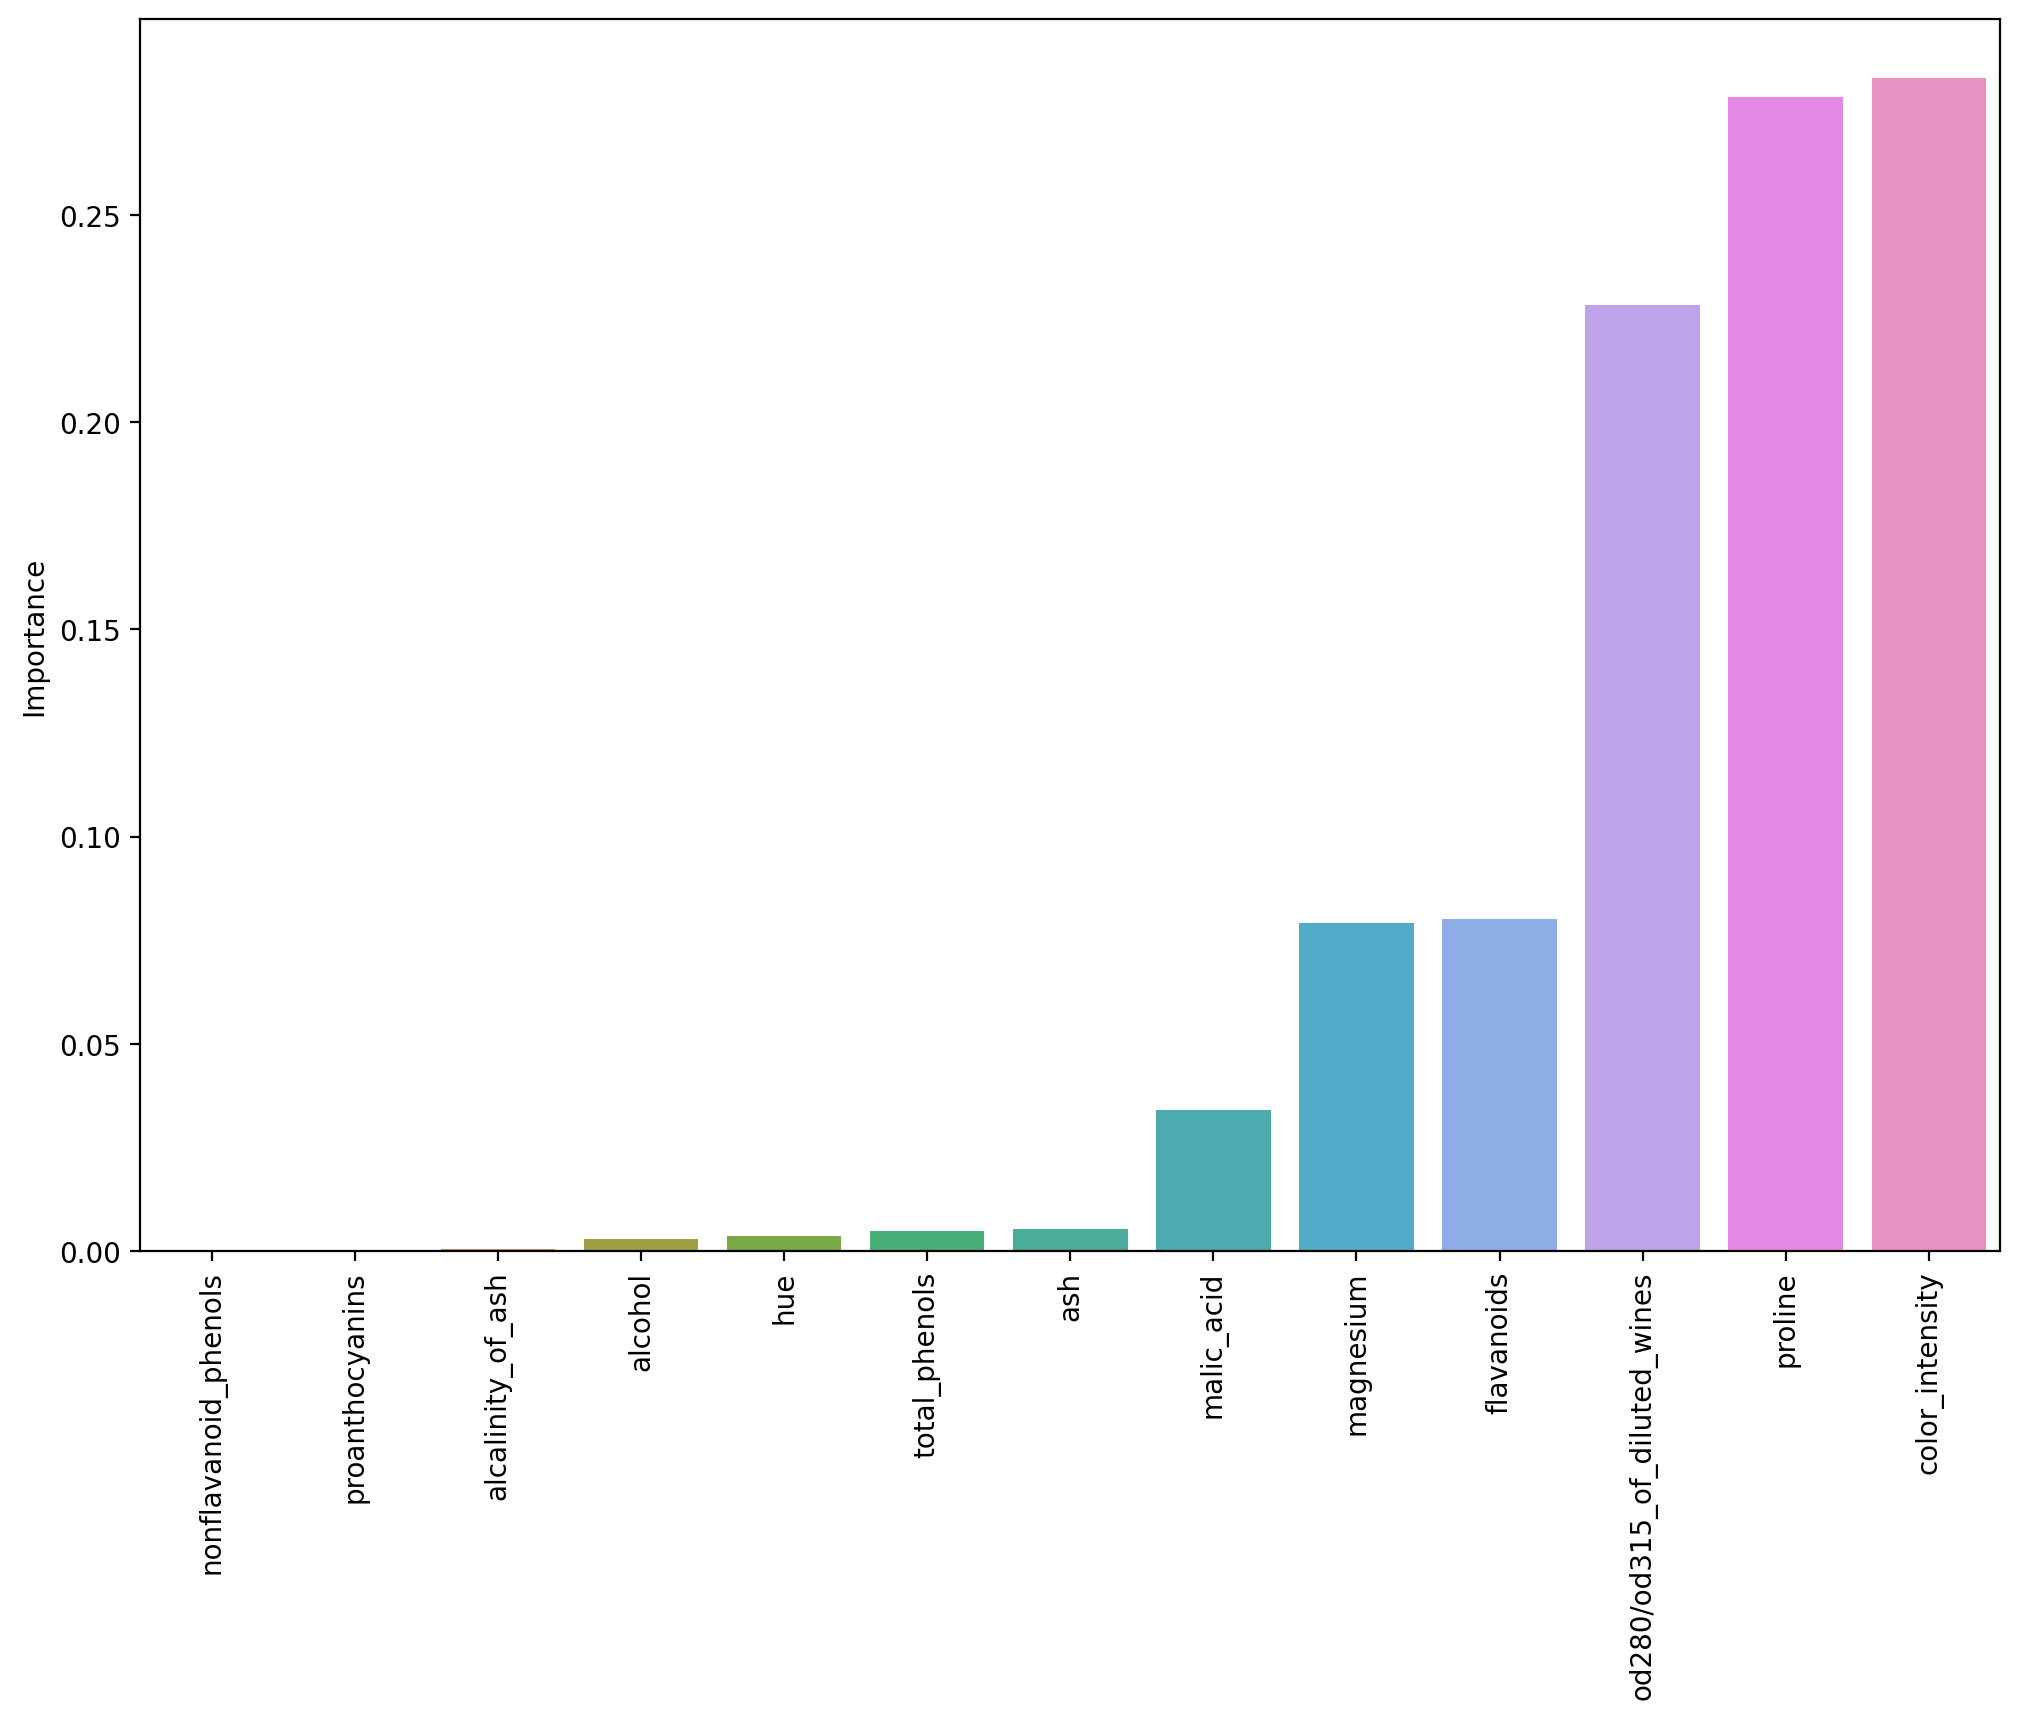

In [ ]:
# visualizzo in grafico
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=imp_feat,
            x=imp_feat.index,
            y='Importance')

plt.xticks(rotation=90)
plt.show()

E' interessante notare che utilizzando anche solo le prime 5 Feature per importanza, la probabilità di classificare correttamente il vino è superiore al 95%.

<a id="6"> </a>

## 6. Conclusioni


Ho affrontato il problema di Classificazione applicando tre diversi algoritmi di Machine Learning: SVC, Random Forest e Gradient Boosting. Per ciascuno dei tre algoritmi, ho sviluppato il Modello utilizando un approccio di scelta degli Iperparametri migliori attraverso la valutazione delle loro performance con Grid Search e Cross Validazione.

Il modello che ha performato meglio è il **Random Forest**, che non ha commesso errori nella classificazione.
Tale modello ha riportato punteggi di **Precision**, **Recall** ed **F1-Score** uguali ad **1** nella classificazione di tutte e tre le categorie di vini.